In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.integrate as si
import numpy as np
from scipy.signal import find_peaks
import time
from datetime import datetime
from matplotlib import collections as matcoll
from pylab import rcParams

In [21]:
sns.set()
rcParams['figure.figsize'] = 10, 5

In [22]:
def data_frame(event):
    return pd.read_csv(event)

In [23]:
event4 = data_frame('OneDrive/Desktop/Honk data/drive-download-20200328T072000Z-001\TEST2\TEST2\REALME\BIKE 28Dec,2019-11-09-44 AM\Testing Data/All_Details2.csv')
event4.head()

,x,y,z,latitude,longitude,speed,sound,light,time,timestamp
0,0.110,3.435,9.264,23.555063,87.29839,0.0,69.713882,19255,11:09:46 AM,1577511586053
1,0.087,3.503,9.229,23.555063,87.29839,0.0,69.713882,19255,11:09:46 AM,1577511586054
2,0.090,3.450,9.243,23.555063,87.29839,0.0,69.713882,19255,11:09:46 AM,1577511586065
3,0.039,3.492,9.257,23.555063,87.29839,0.0,69.713882,19255,11:09:46 AM,1577511586066
4,0.072,3.448,9.326,23.555063,87.29839,0.0,69.713882,19255,11:09:46 AM,1577511586067


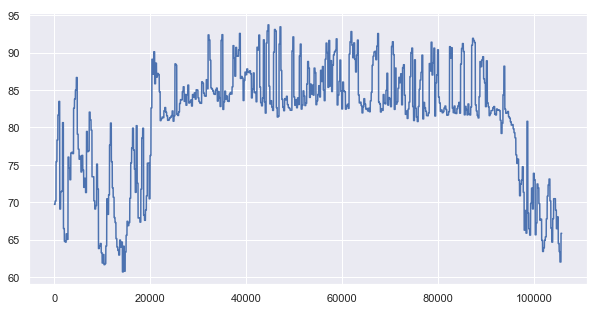

In [24]:
plt.plot(event4.sound)

In [25]:
def time(event):
    date_time = []
    for index in event.index:
        p = pd.Timestamp(event.timestamp.loc[index],unit='ms',tz='Asia/Kolkata')
        date_time.append(p.time())
        
    time = []
    for i in range(len(date_time)):
        a = ((date_time[i].hour*3600 + date_time[i].minute*60 + date_time[i].second) + date_time[i].microsecond*10**(-6))
        time.append(a)
        
    ar = np.array(time)
    event['time'] = ar
        
    return event

In [26]:
event4 = time(event4)
event4.head()

,x,y,z,latitude,longitude,speed,sound,light,time,timestamp
0,0.110,3.435,9.264,23.555063,87.29839,0.0,69.713882,19255,40186.053,1577511586053
1,0.087,3.503,9.229,23.555063,87.29839,0.0,69.713882,19255,40186.054,1577511586054
2,0.090,3.450,9.243,23.555063,87.29839,0.0,69.713882,19255,40186.065,1577511586065
3,0.039,3.492,9.257,23.555063,87.29839,0.0,69.713882,19255,40186.066,1577511586066
4,0.072,3.448,9.326,23.555063,87.29839,0.0,69.713882,19255,40186.067,1577511586067


In [27]:
event4.time[len(event4)-1]-event4.time[0]

264.247000000003

## distance

In [28]:
def distance(event,a1,a2):
    R = 6371
    lat1 = math.radians(event.latitude[a1])
    lon1 = math.radians(event.longitude[a1])

    lat2 = math.radians(event.latitude[a2])
    lon2= math.radians(event.longitude[a2])

    d_lat = lat2 - lat1
    d_lon = lon2 - lon1

    t_s1 = event.time[a1]
    t_s2 = event.time[a2]
    d_t_s = (t_s2-t_s1)
    
    a = math.sin(d_lat / 2.0) ** 2 + math.cos(lat1) * math.cos(lat2) * math.sin(d_lon / 2.0) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    dis = c * R
    
    return dis,d_t_s

## velocity

In [29]:
total_dis,total_time = distance(event4,0,len(event4)-1)
total_vel = total_dis/(total_time/3600)
total_time,total_dis,total_vel

(264.247000000003, 1.7839697987955117, 24.30412180900358)

## window

In [30]:
def window(x,event):
    last_check = 0
    window = []

    nums = []
    for i in range(1,100):
        nums.append(i*x)

    for index in nums:
        window.append(event.loc[last_check:index-1])
        last_check = index
    return window

## honk count

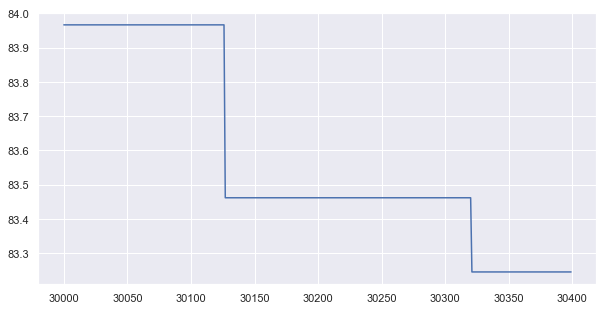

In [31]:
plt.plot(event4.sound[30000:30400])

In [32]:
event4.time[30320]-event4.time[30125]

0.4850000000005821

In [33]:
def honk_indexing(event,n):
    initial_p=[]
    end_p=[]
    total_honk=0
    for i,j in zip(window(n,event)[0:100], range(len(window(n,event)[0:100]))):
        c=0
        ma = np.amax(i.sound)
        if(ma>90):
            for k in i.sound:
                if(k == ma):
                    c += 1
            initial_p.append(np.argmax(i.sound))
            end_p.append(np.argmax(i.sound)+c)  
    
        if(ma>90):
            total_honk += 1
    return initial_p,end_p,total_honk;

In [35]:
initial_p,end_p,total_honk = honk_indexing(event4,1000)
initial_p,end_p,total_honk

([20705,
  32049,
  34935,
  35000,
  37243,
  38591,
  42625,
  43586,
  44548,
  45894,
  46000,
  47047,
  49739,
  51277,
  56661,
  57238,
  58776,
  61852,
  62000,
  63198,
  66852,
  67428,
  70504,
  74542,
  78579,
  79155,
  80000,
  82423,
  84922,
  85114,
  87229],
 [20899,
  32241,
  35000,
  35127,
  37434,
  38779,
  42817,
  43779,
  44739,
  46000,
  46085,
  47239,
  49931,
  51469,
  56852,
  57430,
  58968,
  62000,
  62044,
  63390,
  67000,
  67620,
  70696,
  74733,
  78769,
  79347,
  80115,
  82615,
  85000,
  85307,
  87421],
 31)

In [36]:
def honk_dur_dis_vel(event):
    dis=[]
    dur=[]
    vel=[]
    for i,j in zip(initial_p,end_p):
        d,t=distance(event,i,j)
        dis.append(d)
        dur.append(t)
        v = d/(t/3600)
        vel.append(v)
    return dis,dur,vel

In [37]:
honk_dis,honk_dur,honk_vel = honk_dur_dis_vel(event4)
honk_dis,honk_dur,honk_vel

([0.0,
  0.0,
  0.0,
  0.0,
  0.014951167184674754,
  0.0,
  0.0,
  0.01448311350653355,
  0.0,
  0.0,
  0.016178649050487805,
  0.0,
  0.0,
  0.0,
  0.0,
  0.013760488846392208,
  0.013421062774773321,
  0.0,
  0.0,
  0.012445768935685836,
  0.012530305337145952,
  0.0,
  0.0,
  0.0,
  0.0,
  0.009089883655981157,
  0.0,
  0.009761159640738655,
  0.0,
  0.0,
  0.009055644819536995],
 [0.4830000000001746,
  0.4820000000036089,
  0.1610000000000582,
  0.3190000000031432,
  0.47400000000197906,
  0.47100000000500586,
  0.48099999999976717,
  0.48399999999674037,
  0.47699999999895226,
  0.26299999999901047,
  0.21499999999650754,
  0.4789999999993597,
  0.47800000000279397,
  0.4789999999993597,
  0.477999999995518,
  0.48099999999976717,
  0.4800000000032014,
  0.3669999999983702,
  0.11000000000058208,
  0.48099999999976717,
  0.36799999999493593,
  0.4810000000070431,
  0.477999999995518,
  0.4749999999985448,
  0.4770000000062282,
  0.4789999999993597,
  0.2919999999940046,
  0.48000